## Scraping

In [10]:
#source = requests.get('http://localhost:8080/ui/termos').text
from selenium import webdriver
import time

In [52]:
driver=webdriver.Chrome('D:\\dev\\projetos\\tcc_data_science\\chromedriver.exe')
regioes = ["regiao-1", "regiao-2"]
for regiao in regioes:
    for i in range(1,5):
        time.sleep(0.5)
        if i==1:
#             driver.get(f'https://www.wimoveis.com.br/imoveis-aluguel-{regiao}-df.html')
            print(f'https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-{regiao}-df.html')
        else:
#             driver.get(f'https://www.wimoveis.com.br/imoveis-aluguel-{regiao}-df-pagina-{i}.html')
            print(f'https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-{regiao}-df-pagina-{i}.html')
#         html = driver.page_source
#         f = open(f'{regiao}_page{i}.html', "a")
#         f.write(html)
#         f.close()

https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df-pagina-2.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df-pagina-3.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df-pagina-4.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df-pagina-2.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df-pagina-3.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df-pagina-4.html


## Beautiful Soup - open file and commands

In [200]:
from bs4 import BeautifulSoup
import os
import requests
import re
import datetime

In [218]:
#arquivo para logar execução da extração dos dados para eventual verificação
log = open(f'execution_log.txt', "a", encoding="utf-8")
log.write('------------------------------------------------------------------------\n')
log.write(f"inicio_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")

dataset = open(f'dataset.csv', "a", encoding="utf-8")
dataset.write("regiao,area,quartos,banheiros,garagens,condominio,aluguel\n")

# assign directory
directory = 'data_html'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        with open(f) as html_file:
            soup = BeautifulSoup(html_file, 'lxml')
        log.write(f"filename: {f}\n")    
        propertiesCards = soup.find_all('div', class_='postingCardInfo')
        print("quantidade de cards encontrados: ", len(propertiesCards))
        # print("example: \n", propertiesCards[0])
        for index, apto in enumerate(propertiesCards):
            log.write(f"index: {index}\n")
            preco = ''
            cond = ''
            area = ''
            beds = ''
            baths = ''
            garages = ''
            try:
                log.write(f"in: {apto.find(class_='firstPrice').text}\n")
                preco = re.search(r'\d+\.?\d+', apto.find(class_="firstPrice").text).group(0).replace('.', '')
                log.write(f"out: {preco}\n")
            except Exception as e:
                print(e)
            try:
                log.write(f"in: {apto.find(class_='postingCardExpenses').text}\n")
                cond = re.search(r'\d+\.?\d+', apto.find(class_="postingCardExpenses").text).group(0).replace('.', '')
                log.write(f"out: {cond}\n")
            except Exception as e:
                print(e)
            mainFeatures = apto.find_all('ul', class_="postingCardMainFeatures")
            for item in mainFeatures:
                listOfLis = item.find_all('li')
                for li in listOfLis:
                    if li.find('i', class_="iconArea"):
                        try:
                            log.write(f"in: {li.text}\n")
                            area = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {area}\n")
                        except Exception as e:
                            print(e)                
                    if li.find('i', class_="iconBathrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            baths = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {baths}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconBedrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            beds = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {baths}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconGarage"):
                        try:
                            log.write(f"in: {li.text}\n")
                            garages = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '') 
                            log.write(f"out: {garages}\n")
                        except Exception as e:
                            print(e)                     
                dataset.write(f'{filename.split("_")[0]},{area},{beds},{baths},{garages},{cond},{preco}\n') 

log.write(f"fim_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")
log.close()
dataset.close()

quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' objec

quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'N

'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  13
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneTy

## Generating dummy data for tests

In [53]:
import random
with open('aptos.csv', 'w') as myFile:
    myFile.write('area,bedrooms,baths,garage,rent\n')
    for i in range(1, 1001):
        flat = [random.choice([50, 60, 70, 100]),random.choice([1, 2, 4]),random.choice([1, 2]),random.choice([0,1])]
        rent = flat[0]*(random.choice([22.3, 25.7, 31])) + flat[1]*(random.choice([322.3, 325.7, 280])) + flat[2]*150 + flat[3]*55 - 320
        myFile.write(f'{flat[0]},{flat[1]},{flat[2]},{flat[3]},{rent}\n')

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [220]:
df = pd.read_csv('dataset.csv')

In [ ]:
# links para os outros datasets
# https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_renda_per_capita
# https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_popula%C3%A7%C3%A3o
# http://www.ssp.df.gov.br/dados-por-regiao-administrativa/

In [236]:
df.info()
df_drop = df.dropna()
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   regiao      1111 non-null   object 
 1   area        1103 non-null   float64
 2   quartos     744 non-null    float64
 3   banheiros   949 non-null    float64
 4   garagens    514 non-null    float64
 5   condominio  619 non-null    float64
 6   aluguel     1111 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   regiao      309 non-null    object 
 1   area        309 non-null    float64
 2   quartos     309 non-null    float64
 3   banheiros   309 non-null    float64
 4   garagens    309 non-null    float64
 5   condominio  309 non-null    float64
 6   aluguel     309 non-null

<Figure size 432x288 with 0 Axes>

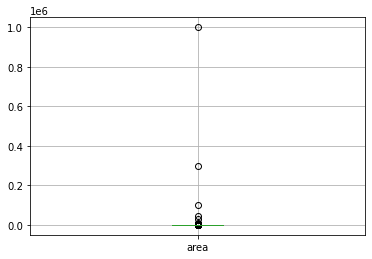

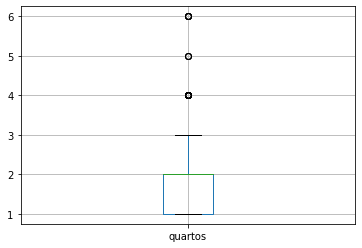

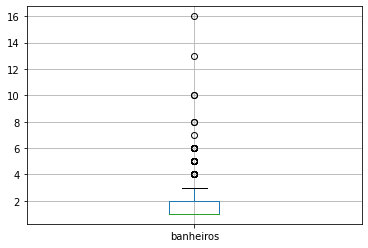

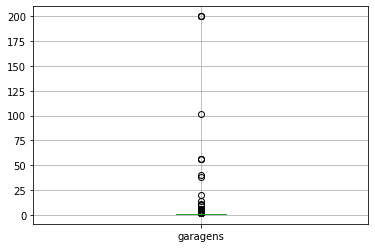

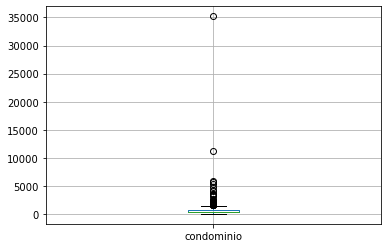

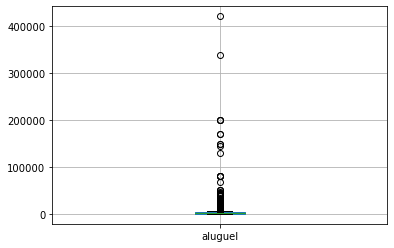

In [239]:
import matplotlib.pyplot as plt

for column in df:
    plt.figure()
    if column != 'regiao':
        df.boxplot([column])

In [248]:
X = df_drop.iloc[:,1:5]

In [249]:
y = df_drop.iloc[:, -1]

In [250]:
X, y

(        area  quartos  banheiros  garagens
 0      156.0      4.0        4.0       2.0
 1      186.0      4.0        2.0       3.0
 2     3636.0      1.0        1.0       1.0
 3       55.0      2.0        1.0       1.0
 4       40.0      1.0        1.0       1.0
 ...      ...      ...        ...       ...
 1038    79.0      3.0        2.0       1.0
 1040    64.0      2.0        1.0       1.0
 1044    52.0      2.0        2.0       1.0
 1056    60.0      2.0        1.0       1.0
 1105    50.0      2.0        1.0       1.0
 
 [309 rows x 4 columns],
 0       4800
 1       4500
 2       1550
 3        800
 4       1100
         ... 
 1038    1700
 1040    1200
 1044    1250
 1056    1000
 1105    1100
 Name: aluguel, Length: 309, dtype: int64)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [252]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: ", lr.coef_)
print("lr.intercept_): ", lr.intercept_)

lr.coef_:  [4.18906107e-04 5.01694609e+02 9.71727945e+02 1.38687948e+03]
lr.intercept_):  -1763.9171583586472


In [253]:
print("training score:\n", lr.score(X_train, y_train))
print("test score\n", lr.score(X_test, y_test))


training score:
 0.6090597244553135
test score
 0.6285353723154781


## Ridge

In [254]:
from sklearn.linear_model import Ridge

In [255]:
ridge = Ridge().fit(X_train, y_train)
print("lr.coef_: ", lr.coef_)
print("lr.intercept_): ", lr.intercept_)

lr.coef_:  [4.18906107e-04 5.01694609e+02 9.71727945e+02 1.38687948e+03]
lr.intercept_):  -1763.9171583586472


In [256]:
print("training score:\n", ridge.score(X_train, y_train))
print("test score\n", ridge.score(X_test, y_test))

training score:
 0.6090228168457259
test score
 0.6285147601985276
